The training dataset is from https://github.com/mjag7682/NLP-of-StockTwits-data-for-predicting-stocks

In [ ]:
import pandas as pd
from tqdm import tqdm
import yfinance as yf
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
import pandas as pd

# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/TeamCapstone/BERT/Combined_FAANG_percentage_2.2.csv')
data['symbol'] = data['symbol'].replace({'FB':'META'})

codes = ['AAPL', 'AMZN', 'META', 'GOOGL', 'NFLX']

start_date = data['Date'].min()
end_date = data['Date'].max()

res = []


for ticker_symbol in tqdm(codes):
    ticker = yf.Ticker(ticker_symbol)
    df = ticker.history(start=start_date, end=end_date)
    df['symbol'] = ticker_symbol
    res.append(df)


price = pd.concat(res).reset_index()
price['Time'] = price['Date'].dt.strftime('%H:%M:%S')
price['Date'] = price['Date'].dt.strftime('%Y-%m-%d')

price['Pctchange'] = (price['Close'] - price['Open'])/price['Open']

price_new = pd.DataFrame(price.values[1:,1:], index = price['Date'].values[:-1], columns = price.columns[1:]).reset_index()
price_new.columns = price.columns
sentiment = pd.merge(data, price_new, left_on=['Date','symbol'], right_on=['Date','symbol'], how='outer')
sentiment = sentiment.sort_values('Date')
codes = sentiment.symbol.unique()
res = []
for code in codes:
    df_temp = sentiment[sentiment['symbol']==code]
    df_temp['Pctchange'] = df_temp['Pctchange'].fillna(method='bfill')
    df_temp = df_temp[['message','symbol','Date','Pctchange','Open','High','Low','Close','Volume','Dividends','Stock Splits']].dropna()
    res.append(df_temp)
    data_final = pd.concat(res)
def calculate_label(x):
  if x>std:
    return 2
  elif x<-std:
    return 0
  else:
    return 1

std = data_final['Pctchange'].std()
data_final['label'] = data_final['Pctchange'].apply(calculate_label)

min_num = data_final.groupby('label').agg('count').min().min()

res = []
for i in data_final['label'].unique():
  res.append(data_final[data_final['label']==i].sample(min_num))

data_final1 = pd.concat(res)
data_final1.groupby('label').agg('count')

print(data_final['Date'].min(),data_final['Date'].max())
data_final

Mounted at /content/drive


100%|██████████| 5/5 [00:01<00:00,  3.99it/s]
<ipython-input-2-39c6d1423e7d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Pctchange'] = df_temp['Pctchange'].fillna(method='bfill')
<ipython-input-2-39c6d1423e7d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Pctchange'] = df_temp['Pctchange'].fillna(method='bfill')
<ipython-input-2-39c6d1423e7d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

2009-07-10 2020-07-21


,message,symbol,Date,Pctchange,Open,High,Low,Close,Volume,Dividends,Stock Splits,label
2566825,youtube talks stream movies rentals goog appl ...,NFLX,2009-09-02,-0.024692,5.901429,5.928571,5.61,5.755714,19494300,0.0,0.0,0
2566822,nflx awards 1 mill better movie search engine ...,NFLX,2009-09-21,-0.003549,6.842857,6.885714,6.76,6.818571,6386800,0.0,0.0,1
2566823,39 mbt 47 swapped nflx,NFLX,2009-09-21,-0.003549,6.842857,6.885714,6.76,6.818571,6386800,0.0,0.0,1
2566824,long nflx,NFLX,2009-09-21,-0.003549,6.842857,6.885714,6.76,6.818571,6386800,0.0,0.0,1
2566821,get long nflx stop 44 50,NFLX,2009-09-22,-0.022941,6.85,6.855714,6.685714,6.692857,5079900,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1681838,spy fb mcd nflx disca astrazeneca co head says...,META,2020-07-20,-0.018155,246.220001,246.910004,240.080002,241.75,19364200,0.0,0.0,1
1681839,fb quot walt disney dis dramatically slashed a...,META,2020-07-20,-0.018155,246.220001,246.910004,240.080002,241.75,19364200,0.0,0.0,1
1681840,fb fb vs tmo tradingview,META,2020-07-20,-0.018155,246.220001,246.910004,240.080002,241.75,19364200,0.0,0.0,1
1681841,fb tmo ea boring,META,2020-07-20,-0.018155,246.220001,246.910004,240.080002,241.75,19364200,0.0,0.0,1


In [ ]:
df_train = data_final1[data_final['Date']<='2014-12-31']
df_test = data_final1[(data_final['Date']>'2014-12-31') & (data_final['Date']<'2016-12-31')]
# p = 0.8
# for code in data_final['symbol'].unique():
#     temp = data_final[data_final['symbol']==code]
#     split_num = int(p*len(temp))
#     df_train.append(temp.iloc[:split_num])
#     df_test.append(temp.iloc[split_num:])
# df_train = pd.concat(df_train)
# df_test = pd.concat(df_test)

<ipython-input-7-9411fdaea1ad>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train = data_final1[data_final['Date']<='2014-12-31']
<ipython-input-7-9411fdaea1ad>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = data_final1[(data_final['Date']>'2014-12-31') & (data_final['Date']<'2016-12-31')]


In [ ]:
df_val = data_final[data_final['Date']>'2016-12-31']

In [ ]:
df_val.groupby('label').agg('count')

,message,symbol,Date,Pctchange,Open,High,Low,Close,Volume,Dividends,Stock Splits
label,,,,,,,,,,,
0,150639,150639,150639,150639,150639,150639,150639,150639,150639,150639,150639
1,1063262,1063262,1063262,1063262,1063262,1063262,1063262,1063262,1063262,1063262,1063262
2,145005,145005,145005,145005,145005,145005,145005,145005,145005,145005,145005


# FinBert

In [ ]:
from pathlib import Path
import shutil
import os
import logging
import sys
sys.path.append('/content/drive/MyDrive/TeamCapstone/BERT/finBERTmaster/')

from textblob import TextBlob
from pprint import pprint
from sklearn.metrics import classification_report

from transformers import AutoModelForSequenceClassification

from finbert.finbert import *
import finbert.utils as tools
from transformers import BertTokenizer, BertForSequenceClassification, pipeline, BertModel
from datetime import datetime
%load_ext autoreload
%autoreload 2

project_dir = Path.cwd().parent
pd.set_option('max_colwidth', -1)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<ipython-input-5-26378f52f528>:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [ ]:
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=df_train['label'].nunique(), ignore_mismatched_sizes=True)
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())

# Only for model training, don't run otherwise -- ># Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# Ensure all data in 'Body' is a string and not empty
df_train['Body'] = df_train['message'].astype(str)  # Convert to string in case there are non-string types

<ipython-input-49-1d86018d6b61>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Body'] = df_train['message'].astype(str)  # Convert to string in case there are non-string types


In [ ]:
## Only for model training, don't run otherwise -- > Tokenize the text data
### takes c.10min

encoded_data_train = tokenizer.batch_encode_plus(
    df_train['Body'].tolist(),
    truncation=True,
    padding=True,
    max_length=48
)


In [ ]:
# Only for model training, don't run otherwise -- >
input_ids_train = torch.tensor(encoded_data_train['input_ids'])
attention_masks_train = torch.tensor(encoded_data_train['attention_mask'])


In [ ]:
labels_train = torch.tensor(df_train['label'].values)

In [ ]:
# Only for model training, don't run otherwise -- >
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler

# Create a DataLoader
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=32)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
df_test['Body'] = df_test['message'].astype(str)
encoded_data_test = tokenizer.batch_encode_plus(
    df_test['Body'].tolist(),
    truncation=True,
    padding=True,
    max_length=48
)

input_ids_test = torch.tensor(encoded_data_test['input_ids'])
attention_masks_test = torch.tensor(encoded_data_test['attention_mask'])
labels_test = torch.tensor(df_test['label'].values)

### Step 3
# Create a DataLoader
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, sampler=SequentialSampler(dataset_test), batch_size=32)

# Evaluation mode
model.eval()

<ipython-input-55-2d43c6719940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Body'] = df_test['message'].astype(str)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Only for model training, don't run otherwise -- > IMPORTANT FUNCTION, takes 5.0hours
# Training loop
num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(dataloader_train):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0]
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    model.eval()
    predictions = []
    print('Training completed, now validation begins')
    # Predict on test data
    for batch in tqdm(dataloader_test):
        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        with torch.no_grad():
            outputs = model(**inputs)

        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        predictions.append(logits)

    predictions = np.concatenate(predictions, axis=0)

    # Convert logits to predicted class
    preds = np.argmax(predictions, axis=1)
    y = df_test['label'].tolist()

    print('Epoch ', epoch)
    print(accuracy_score(y, preds))
    print(classification_report(y, preds, digits=3))
    df_test[['Neg','Neu','Pos']] = predictions
# Only for model training, don't run otherwise -- > save to drive
    model.save_pretrained("/content/drive/My Drive/Bert_Predict_2-5year_with_validation/"+str(epoch))
    df_test.to_csv('/content/drive/My Drive/test_data_with_validation/' +str(epoch) +'.csv' )


<ipython-input-56-cb55ca73bef3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_train):


  0%|          | 0/4645 [00:00<?, ?it/s]

Training completed, now validation begins


<ipython-input-56-cb55ca73bef3>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5600 [00:00<?, ?it/s]

Epoch  0
0.42117334553591856
              precision    recall  f1-score   support

           0      0.312     0.106     0.158     60706
           1      0.462     0.556     0.505     59126
           2      0.414     0.609     0.493     59365

    accuracy                          0.421    179197
   macro avg      0.396     0.424     0.385    179197
weighted avg      0.395     0.421     0.383    179197



<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions
<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions
<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

  0%|          | 0/4645 [00:00<?, ?it/s]

Training completed, now validation begins


<ipython-input-56-cb55ca73bef3>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5600 [00:00<?, ?it/s]

Epoch  1
0.418611918726318
              precision    recall  f1-score   support

           0      0.340     0.171     0.228     60706
           1      0.449     0.637     0.526     59126
           2      0.417     0.454     0.435     59365

    accuracy                          0.419    179197
   macro avg      0.402     0.421     0.396    179197
weighted avg      0.401     0.419     0.395    179197



<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions
<ipython-input-56-cb55ca73bef3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_train):


  0%|          | 0/4645 [00:00<?, ?it/s]

Training completed, now validation begins


<ipython-input-56-cb55ca73bef3>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5600 [00:00<?, ?it/s]

Epoch  2
0.4154366423545037
              precision    recall  f1-score   support

           0      0.328     0.117     0.172     60706
           1      0.449     0.595     0.512     59126
           2      0.406     0.542     0.464     59365

    accuracy                          0.415    179197
   macro avg      0.394     0.418     0.383    179197
weighted avg      0.394     0.415     0.381    179197



<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions
<ipython-input-56-cb55ca73bef3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_train):


  0%|          | 0/4645 [00:00<?, ?it/s]

Training completed, now validation begins


<ipython-input-56-cb55ca73bef3>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5600 [00:00<?, ?it/s]

Epoch  3
0.39365614379705016
              precision    recall  f1-score   support

           0      0.321     0.259     0.287     60706
           1      0.454     0.423     0.438     59126
           2      0.396     0.502     0.443     59365

    accuracy                          0.394    179197
   macro avg      0.391     0.395     0.389    179197
weighted avg      0.390     0.394     0.389    179197



<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions
<ipython-input-56-cb55ca73bef3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_train):


  0%|          | 0/4645 [00:00<?, ?it/s]

Training completed, now validation begins


<ipython-input-56-cb55ca73bef3>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5600 [00:00<?, ?it/s]

Epoch  4
0.38395174026350887
              precision    recall  f1-score   support

           0      0.330     0.251     0.285     60706
           1      0.446     0.391     0.416     59126
           2      0.375     0.513     0.433     59365

    accuracy                          0.384    179197
   macro avg      0.384     0.385     0.378    179197
weighted avg      0.383     0.384     0.378    179197



<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions
<ipython-input-56-cb55ca73bef3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_train):


  0%|          | 0/4645 [00:00<?, ?it/s]

Training completed, now validation begins


<ipython-input-56-cb55ca73bef3>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5600 [00:00<?, ?it/s]

Epoch  5
0.37644045380224
              precision    recall  f1-score   support

           0      0.332     0.388     0.358     60706
           1      0.452     0.313     0.370     59126
           2      0.377     0.428     0.401     59365

    accuracy                          0.376    179197
   macro avg      0.387     0.376     0.376    179197
weighted avg      0.387     0.376     0.376    179197



<ipython-input-56-cb55ca73bef3>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[['Neg','Neu','Pos']] = predictions


# Test Models

In [ ]:
model = BertForSequenceClassification.from_pretrained('/content/drive/My Drive/Bert_Predict_2-5year_with_validation/2',num_labels=df_train['label'].nunique(), ignore_mismatched_sizes=True)
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
df_test['Body'] = df_test['message'].astype(str)
encoded_data_test = tokenizer.batch_encode_plus(
    df_test['Body'].tolist(),
    truncation=True,
    padding=True,
    max_length=48
)

input_ids_test = torch.tensor(encoded_data_test['input_ids'])
attention_masks_test = torch.tensor(encoded_data_test['attention_mask'])
labels_test = torch.tensor(df_test['label'].values)

### Step 3
# Create a DataLoader
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, sampler=SequentialSampler(dataset_test), batch_size=32)

<ipython-input-10-9361eee806c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Body'] = df_test['message'].astype(str)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained('/content/drive/My Drive/Bert_Predict_2-5year_with_validation/3',num_labels=df_train['label'].nunique(), ignore_mismatched_sizes=True).to(device)
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
predictions = []
for batch in tqdm(dataloader_test):
    batch = tuple(b.to(device) for b in batch)

    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[1]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)

# Convert logits to predicted class
preds = np.argmax(predictions, axis=1)
y = df_test['label'].tolist()

<ipython-input-12-5bbea3031079>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(dataloader_test):


  0%|          | 0/5586 [00:00<?, ?it/s]

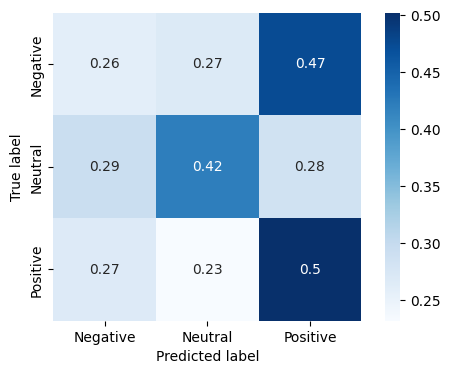

In [ ]:

from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix(y, preds, normalize='true'), range(3), range(3))

labels = ["Negative", "Neutral", "Positive"]

model_name = "FinBERT_base"
plt.figure(figsize=(6,4))
ax = sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
ax.set_xticklabels(labels)  # Set x-axis labels
ax.set_yticklabels(labels)  # Set y-axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Save the plot
#plt.savefig(model_name + "_" + label.lower() + ".eps")

plt.show()

# Generate the features for RL models

In [ ]:
model = BertForSequenceClassification.from_pretrained('/content/drive/My Drive/Bert_Predict_2-5year_with_validation/2',num_labels=df_train['label'].nunique(), ignore_mismatched_sizes=True)
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())

# Only for model training, don't run otherwise -- ># Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# Ensure all data in 'Body' is a string and not empty
df_val['Body'] = df_val['message'].astype(str)  # Convert to string in case there are non-string types


## Only for model training, don't run otherwise -- > Tokenize the text data
### takes c.10min

encoded_data_val = tokenizer.batch_encode_plus(
    df_val['Body'].tolist(),
    truncation=True,
    padding=True,
    max_length=48
)

# Only for model training, don't run otherwise -- >
input_ids_val = torch.tensor(encoded_data_val['input_ids'])
attention_masks_val = torch.tensor(encoded_data_val['attention_mask'])


labels_val = torch.tensor(df_val['label'].values)


dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataloader_val = DataLoader(dataset_val, sampler=SequentialSampler(dataset_val), batch_size=32)

# Evaluation mode
model.eval()

<ipython-input-16-83e627424961>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Body'] = df_val['message'].astype(str)  # Convert to string in case there are non-string types


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [1]:
predictions = []
for batch in tqdm(dataloader_val):
    batch = tuple(b.to(device) for b in batch)

    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[1]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)

# Convert logits to predicted class
preds = np.argmax(predictions, axis=1)
y = df_val['label'].tolist()

df_val[['Neg','Neu','Pos']] = predictions

df_val.to_csv('/content/drive/MyDrive/final_data2_2.csv')